# Yeast

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import scipy
import seaborn as sns
import math

from scipy.io import arff
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay, classification_report,accuracy_score,f1_score


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
# change the trees

## Loading Data

In [3]:
Datset = pd.read_csv("Classification_Datasets/6_Yeast/yeast.data",delim_whitespace=True) 


In [4]:
df = pd.DataFrame(Datset)
df.head()

ADT1_YEAST  0.58  0.61  0.47  0.13  0.50  0.00  0.48  0.22  MIT
0  ADT2_YEAST  0.43  0.67  0.48  0.27   0.5   0.0  0.53  0.22  MIT
1  ADT3_YEAST  0.64  0.62  0.49  0.15   0.5   0.0  0.53  0.22  MIT
2  AAR2_YEAST  0.58  0.44  0.57  0.13   0.5   0.0  0.54  0.22  NUC
3  AATM_YEAST  0.42  0.44  0.48  0.54   0.5   0.0  0.48  0.22  MIT
4  AATC_YEAST  0.51  0.40  0.56  0.17   0.5   0.5  0.49  0.22  CYT

## Data preparation and Analysis

In [27]:
print(np.count_nonzero(Datset==np.nan))

0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ADT1_YEAST  1483 non-null   int64  
 1   0.58        1483 non-null   float64
 2   0.61        1483 non-null   float64
 3   0.47        1483 non-null   float64
 4   0.13        1483 non-null   float64
 5   0.50        1483 non-null   float64
 6   0.00        1483 non-null   float64
 7   0.48        1483 non-null   float64
 8   0.22        1483 non-null   float64
 9   MIT         1483 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 116.0 KB


In [28]:
frequency = df['MIT'].value_counts()
print(frequency)
print("-------")

CYT    463
NUC    429
MIT    243
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: MIT, dtype: int64
-------


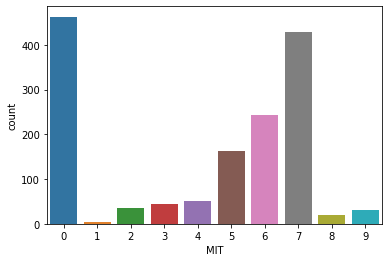

In [17]:
sns.countplot(x='MIT', data= df);

In [12]:
# plt.plot()
# plt.ylabel('Frequency')
# plt.xlabel('Class')
# plt.bar( ("1","0"), frequency)
# plt.suptitle("Distributation")
# plt.show()

ok


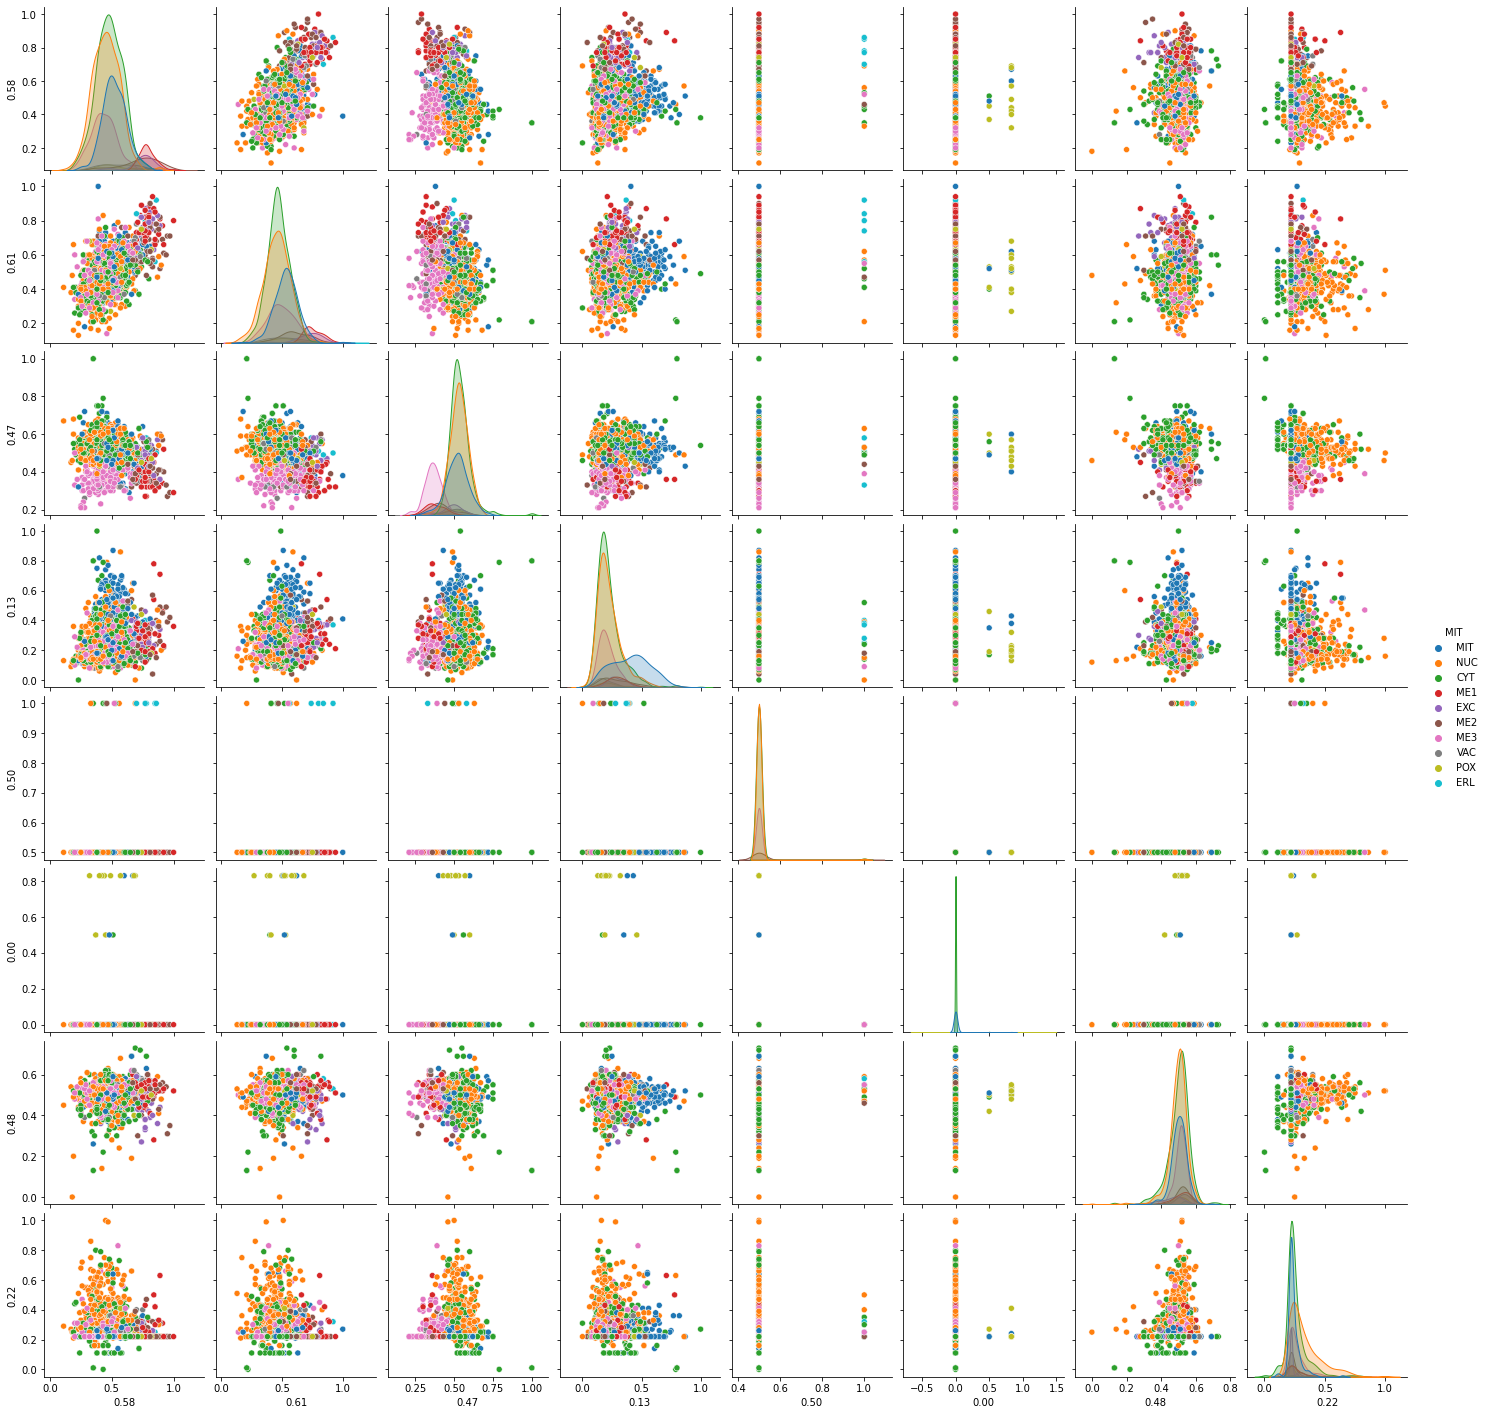

In [30]:
sns.pairplot(df, hue="MIT")
print("ok")

<AxesSubplot:>

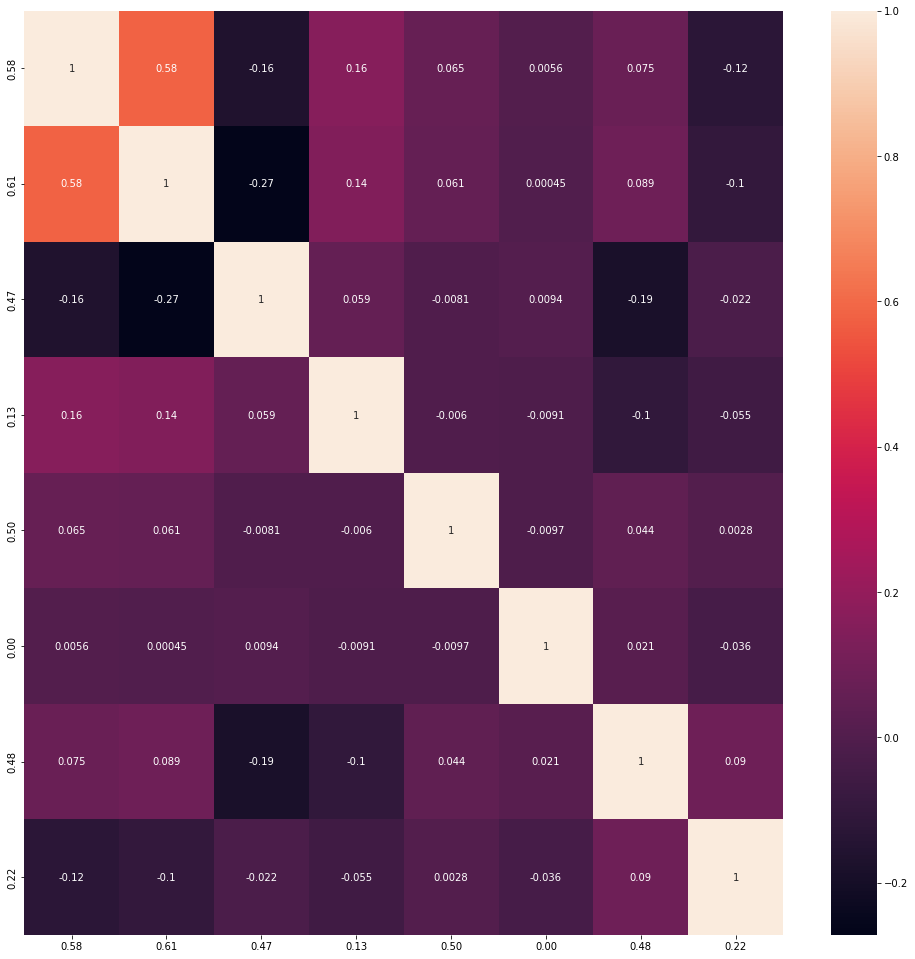

In [31]:
plt.figure(figsize=(17,17))
sns.heatmap(df.corr(), annot =True)

In [5]:
# loop to iterate through all columns in dataframe and check if the data is string type
for column in df:
    if type(df[column][0]) == str:
        # if data in column is type string, we want to convert it to equivalent numerical labels
        label_encoder = LabelEncoder()
        integer_encoded = label_encoder.fit_transform(df[column])
        df[column] = integer_encoded

### Defining Dictionary of Models

In [55]:
MODELS = {'logistic_r', 'svc', 'tree', 'random_forest_r', 'knn', 'adaboost', 'gnb', 'nn'}
yeast_dict = {}    

## Train and Test set

In [7]:
x = df.iloc[:,:-1]
y= df.iloc[:,-1:]
# y = df.Class.apply(lambda x: pd.to_numeric(str(x)[2]))

In [8]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)

y_train = y_train.to_numpy().reshape(-1)
y_test = y_test.to_numpy().reshape(-1)

In [70]:
StScale = StandardScaler()
X_train = StScale.fit_transform(X_train)
X_test = StScale.transform(X_test)

In [71]:
from tabulate import tabulate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay, classification_report,accuracy_score,f1_score

def model_results(model):
    table = [["Parameters / Metrics", "Tuned"]]
    curr_model = model['model']
    

    if model['hyperparameters'] == 1:
        for param in curr_model.best_params_:
            table.append([param, curr_model.best_params_[param]])

    prediction = curr_model.predict(X_test)
    print(classification_report(y_test, prediction))
    print(confusion_matrix (y_test, prediction))
    ConfusionMatrixDisplay.from_predictions(y_test, prediction);
    mse = mean_squared_error(y_test, prediction)
    accuracy = accuracy_score(y_test, prediction)
    weighted_f1 = f1_score(y_test, prediction, average='weighted')
    macro_f1 = f1_score(y_test, prediction, average='macro')
    W_recall = recall_score(y_test, prediction,average='weighted')
    
    table.append(['Accuracy',accuracy])
    table.append(['weighted_f1', weighted_f1])
    table.append(['macro_f1',macro_f1])
    table.append(['weighted_Recall',W_recall])

    prediction_trn = curr_model.predict(X_train)
    accuracy_trn = accuracy_score(y_train, prediction_trn)
    weighted_f1_trn = f1_score(y_train, prediction_trn, average='weighted')
    macro_f1_trn = f1_score(y_train, prediction_trn, average='macro')
    W_recall_trn = recall_score(y_train, prediction_trn,average='weighted')
    
    table.append(['Accuracy (tarin)',accuracy_trn])
    table.append(['weighted_f1 (tarin)', weighted_f1_trn])
    table.append(['macro_f1 (tarin)',macro_f1_trn])
    table.append(['weighted_Recall (tarin)',W_recall_trn])
    
    print(tabulate(table, headers='firstrow', tablefmt='grid'))

    return prediction

## 1. LogisticRegression for Classification

In [72]:
logistic_r = LogisticRegression(random_state=0)
logistic_r.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

## LogisticRegression Analysis

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

           0       0.53      0.79      0.63        98
           1       1.00      0.67      0.80         3
           2       0.75      0.55      0.63        11
           3       0.89      0.89      0.89         9
           4       0.50      0.27      0.35        11
           5       0.70      0.78      0.74        27
           6       0.62      0.52      0.57        48
           7       0.67      0.46      0.55        80
           8       0.50      0.33      0.40         3
           9       0.00      0.00      0.00         7

    accuracy                           0.61       297
   macro avg       0.62      0.53      0.56       297
weighted avg       0.61      0.61      0.59       297

[[77  0  0  0  0  0  6 14  1  0]
 [ 1  2  0  0  0  0  0  0  0  0]
 [ 2  0  6  0  2  0  1  0  0  0]
 [ 0  0  0  8  0  1  0  0  0  0]
 [ 3  0  1  0  3  2  2  0  0  0]
 [ 4  0  0  0  0 21  1  1  0  0]
 [17  0  0  1  1  1 25  3  0  0]
 [37  0  0

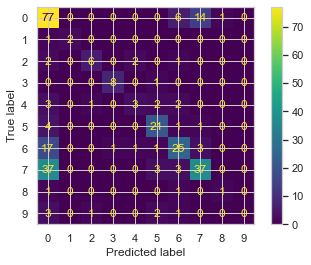

In [73]:
yeast_dict['logistic_r'] = {'model':logistic_r, 'hyperparameters':0}
lr_prediction = model_results(yeast_dict['logistic_r'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

           0       0.53      0.79      0.63        98
           1       1.00      0.67      0.80         3
           2       0.75      0.55      0.63        11
           3       0.89      0.89      0.89         9
           4       0.50      0.27      0.35        11
           5       0.70      0.78      0.74        27
           6       0.62      0.52      0.57        48
           7       0.67      0.46      0.55        80
           8       0.50      0.33      0.40         3
           9       0.00      0.00      0.00         7

    accuracy                           0.61       297
   macro avg       0.62      0.53      0.56       297
weighted avg       0.61      0.61      0.59       297

[[77  0  0  0  0  0  6 14  1  0]
 [ 1  2  0  0  0  0  0  0  0  0]
 [ 2  0  6  0  2  0  1  0  0  0]
 [ 0  0  0  8  0  1  0  0  0  0]
 [ 3  0  1  0  3  2  2  0  0  0]
 [ 4  0  0  0  0 21  1  1  0  0]
 [17  0  0  1  1  1 25  3  0  0]
 [37  0  0

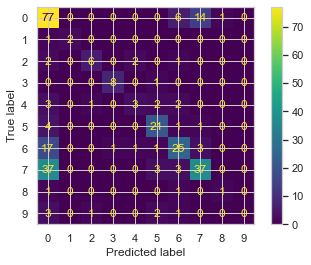

In [74]:
print(classification_report(y_test, lr_prediction))
print(confusion_matrix (y_test, lr_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, lr_prediction);

## 2. Support vector classification

In [75]:
svc = SVC().fit(X_train, y_train)

In [76]:
parameters = {
    'C':[0.1,0.01, 0.001, 0.5,0.7,1,10,50, 100,150,170,180,190, 200,220, 250,300,1000],
    'gamma': ['scale','auto',0.1, 0.01,0.02, 0.05, 0.03, 0.07, 0.001, 0.009, 0.008],
}
svc_model = RandomizedSearchCV(svc, parameters, verbose=10, random_state=0).fit(X_train, y_train)
svc_model.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 1/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.307 total time=   0.1s
[CV 2/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 2/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.308 total time=   0.1s
[CV 3/5; 1/10] START C=0.01, gamma=0.07.........................................


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[CV 3/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.308 total time=   0.1s
[CV 4/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 4/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.308 total time=   0.1s
[CV 5/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 5/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.308 total time=   0.1s
[CV 1/5; 2/10] START C=250, gamma=0.01..........................................
[CV 1/5; 2/10] END ...........C=250, gamma=0.01;, score=0.588 total time=   0.1s
[CV 2/5; 2/10] START C=250, gamma=0.01..........................................
[CV 2/5; 2/10] END ...........C=250, gamma=0.01;, score=0.578 total time=   0.1s
[CV 3/5; 2/10] START C=250, gamma=0.01..........................................
[CV 3/5; 2/10] END ...........C=250, gamma=0.01;, score=0.553 total time=   0.1s
[CV 4/5; 2/10] START C=250, gamma=0.01..........................................
[CV 4/5; 2/10] END .........

{'gamma': 0.009, 'C': 50}

In [77]:
svc_model.best_estimator_

SVC(C=50, gamma=0.009)

## Support vector classification Analysis

              precision    recall  f1-score   support

           0       0.52      0.76      0.62        98
           1       1.00      1.00      1.00         3
           2       0.67      0.55      0.60        11
           3       0.73      0.89      0.80         9
           4       0.25      0.09      0.13        11
           5       0.66      0.70      0.68        27
           6       0.68      0.56      0.61        48
           7       0.58      0.41      0.48        80
           8       0.50      0.33      0.40         3
           9       0.00      0.00      0.00         7

    accuracy                           0.58       297
   macro avg       0.56      0.53      0.53       297
weighted avg       0.57      0.58      0.56       297

[[74  0  0  1  0  0  5 17  1  0]
 [ 0  3  0  0  0  0  0  0  0  0]
 [ 2  0  6  1  2  0  0  0  0  0]
 [ 0  0  0  8  0  1  0  0  0  0]
 [ 2  0  2  1  1  3  2  0  0  0]
 [ 5  0  0  0  1 19  0  2  0  0]
 [15  0  0  0  0  1 27  5  0  0]
 [40  0  0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

+-------------------------+-----------+
| Parameters / Metrics    |     Tuned |
+=========================+===========+
| gamma                   |  0.009    |
+-------------------------+-----------+
| C                       | 50        |
+-------------------------+-----------+
| Accuracy                |  0.579125 |
+-------------------------+-----------+
| weighted_f1             |  0.55965  |
+-------------------------+-----------+
| macro_f1                |  0.532396 |
+-------------------------+-----------+
| weighted_Recall         |  0.579125 |
+-------------------------+-----------+
| Accuracy (tarin)        |  0.639123 |
+-------------------------+-----------+
| weighted_f1 (tarin)     |  0.632403 |
+-------------------------+-----------+
| macro_f1 (tarin)        |  0.652852 |
+-------------------------+-----------+
| weighted_Recall (tarin) |  0.639123 |
+-------------------------+-----------+


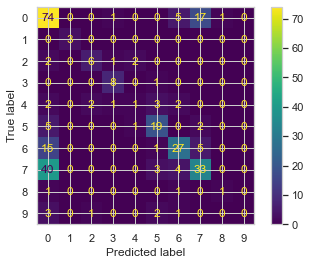

In [78]:
yeast_dict['svc'] = {'model':svc_model, 'hyperparameters':1}
svc_prediction = model_results(yeast_dict['svc'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

           0       0.52      0.76      0.62        98
           1       1.00      1.00      1.00         3
           2       0.67      0.55      0.60        11
           3       0.73      0.89      0.80         9
           4       0.25      0.09      0.13        11
           5       0.66      0.70      0.68        27
           6       0.68      0.56      0.61        48
           7       0.58      0.41      0.48        80
           8       0.50      0.33      0.40         3
           9       0.00      0.00      0.00         7

    accuracy                           0.58       297
   macro avg       0.56      0.53      0.53       297
weighted avg       0.57      0.58      0.56       297

[[74  0  0  1  0  0  5 17  1  0]
 [ 0  3  0  0  0  0  0  0  0  0]
 [ 2  0  6  1  2  0  0  0  0  0]
 [ 0  0  0  8  0  1  0  0  0  0]
 [ 2  0  2  1  1  3  2  0  0  0]
 [ 5  0  0  0  1 19  0  2  0  0]
 [15  0  0  0  0  1 27  5  0  0]
 [40  0  0

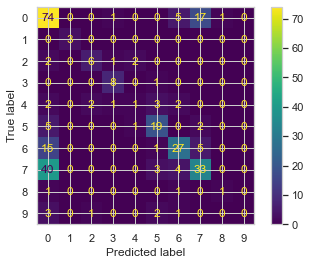

In [79]:
print(classification_report(y_test, svc_prediction))
print(confusion_matrix (y_test, svc_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, svc_prediction);

## Decision tree

In [80]:
tree = DecisionTreeClassifier().fit(X_train, y_train)

In [81]:
parameters = {
    'max_depth': scipy.stats.uniform(1, 100),
    'min_samples_split': scipy.stats.uniform(0, 1) 
}
tree_model = RandomizedSearchCV(tree, parameters, verbose=1, n_iter=20, random_state=0).fit(X_train, y_train)
tree_model.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


{'max_depth': 8.103605819788694, 'min_samples_split': 0.08712929970154071}

## Decision tree Analysis

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

           0       0.51      0.81      0.63        98
           1       0.00      0.00      0.00         3
           2       0.50      0.55      0.52        11
           3       0.53      1.00      0.69         9
           4       0.00      0.00      0.00        11
           5       0.69      0.89      0.77        27
           6       0.74      0.35      0.48        48
           7       0.60      0.40      0.48        80
           8       0.50      0.33      0.40         3
           9       0.00      0.00      0.00         7

    accuracy                           0.57       297
   macro avg       0.41      0.43      0.40       297
weighted avg       0.55      0.57      0.53       297

[[79  0  2  0  0  1  2 13  1  0]
 [ 1  0  1  0  1  0  0  0  0  0]
 [ 2  0  6  3  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0]
 [ 1  0  2  4  0  2  1  1  0  0]
 [ 2  0  0  0  0 24  1  0  0  0]
 [21  0  0  0  0  4 17  6  0  0]
 [44  0  0

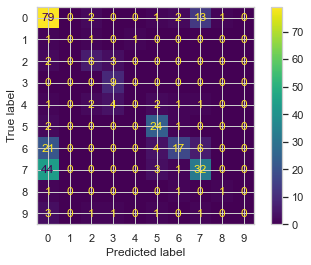

In [82]:
yeast_dict['tree'] = {'model':tree_model, 'hyperparameters':1}
tree_prediction = model_results(yeast_dict['tree'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

           0       0.51      0.81      0.63        98
           1       0.00      0.00      0.00         3
           2       0.50      0.55      0.52        11
           3       0.53      1.00      0.69         9
           4       0.00      0.00      0.00        11
           5       0.69      0.89      0.77        27
           6       0.74      0.35      0.48        48
           7       0.60      0.40      0.48        80
           8       0.50      0.33      0.40         3
           9       0.00      0.00      0.00         7

    accuracy                           0.57       297
   macro avg       0.41      0.43      0.40       297
weighted avg       0.55      0.57      0.53       297

[[79  0  2  0  0  1  2 13  1  0]
 [ 1  0  1  0  1  0  0  0  0  0]
 [ 2  0  6  3  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0]
 [ 1  0  2  4  0  2  1  1  0  0]
 [ 2  0  0  0  0 24  1  0  0  0]
 [21  0  0  0  0  4 17  6  0  0]
 [44  0  0

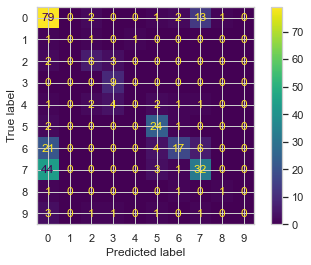

In [83]:
print(classification_report(y_test, tree_prediction))
print(confusion_matrix (y_test, tree_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, tree_prediction);

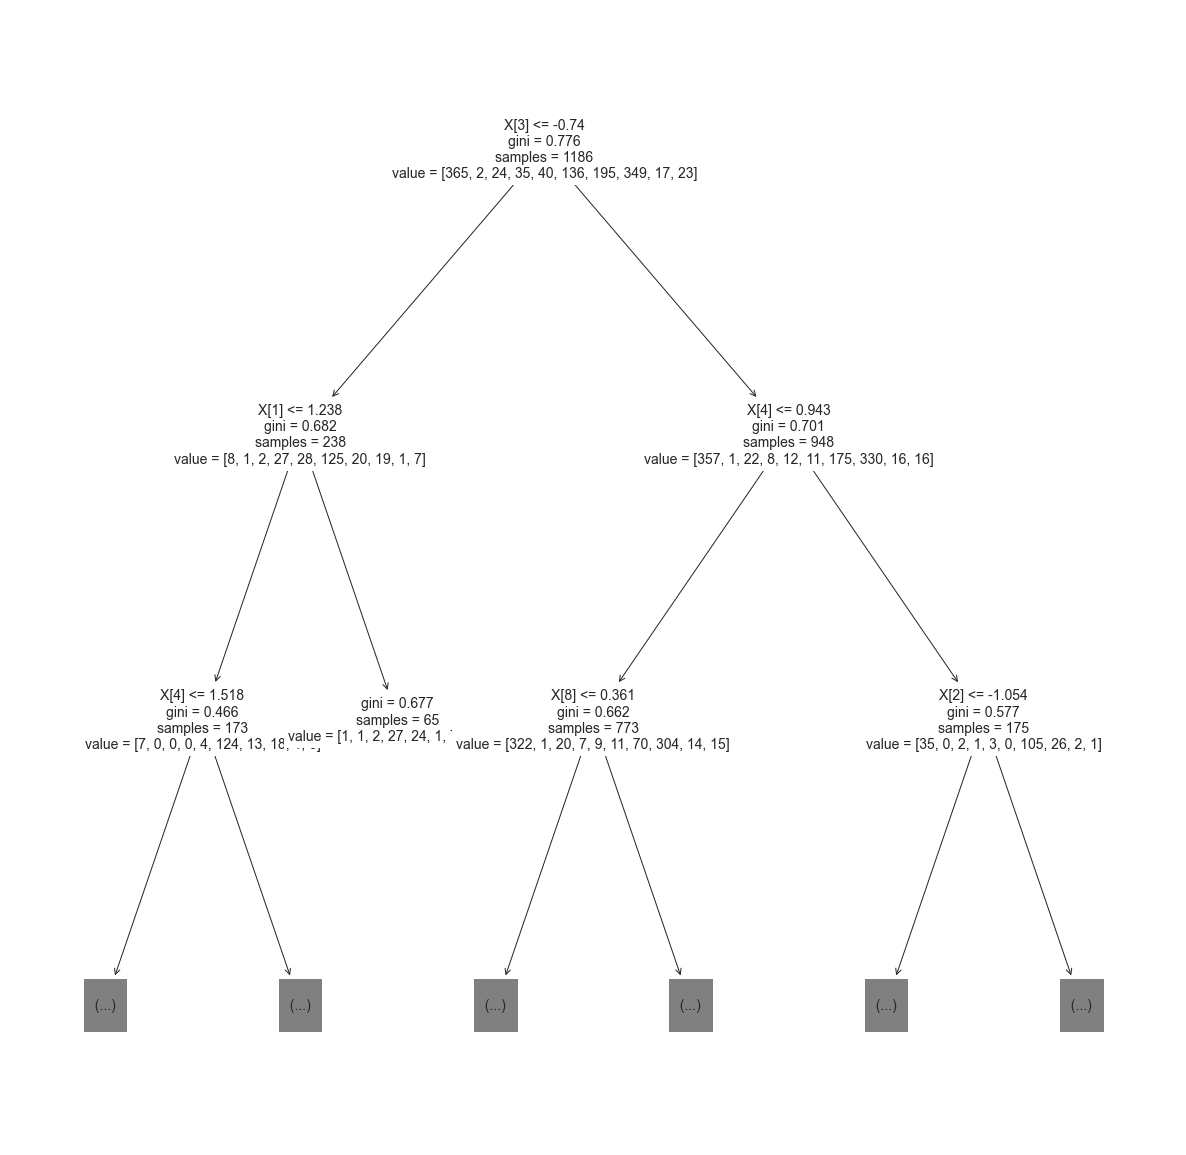

In [84]:
plt.figure(figsize=(21,21))
plot_tree(tree_model.best_estimator_, max_depth = 2, fontsize=14);

## Random Forest

In [85]:
forest = RandomForestClassifier()
forest = forest.fit(X_train, y_train)

In [86]:
parameters = {
    'n_estimators': range(100,150),
    'max_depth': scipy.stats.uniform(1, 100),
}
forest_model = RandomizedSearchCV(forest, parameters, verbose=1, n_iter=20, random_state=0).fit(X_train, y_train)
forest_model.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


{'max_depth': 30.753460654447228, 'n_estimators': 124}

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

           0       0.62      0.76      0.68        98
           1       0.00      0.00      0.00         3
           2       0.50      0.55      0.52        11
           3       0.73      0.89      0.80         9
           4       0.60      0.27      0.37        11
           5       0.67      0.81      0.73        27
           6       0.81      0.52      0.63        48
           7       0.63      0.65      0.64        80
           8       0.50      0.33      0.40         3
           9       1.00      0.14      0.25         7

    accuracy                           0.65       297
   macro avg       0.60      0.49      0.50       297
weighted avg       0.66      0.65      0.63       297

[[74  0  0  1  0  1  2 19  1  0]
 [ 0  0  3  0  0  0  0  0  0  0]
 [ 3  0  6  1  1  0  0  0  0  0]
 [ 0  0  0  8  1  0  0  0  0  0]
 [ 0  0  2  1  3  2  1  2  0  0]
 [ 3  0  0  0  0 22  0  2  0  0]
 [13  0  0  0  0  3 25  7  0  0]
 [24  0  0

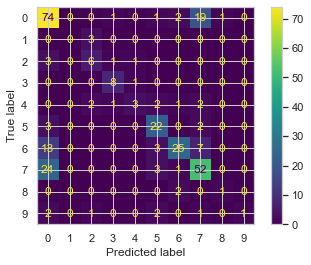

In [87]:
yeast_dict['random_forest_r'] = {'model':forest_model, 'hyperparameters':1}
forest_prediction = model_results(yeast_dict['random_forest_r'])

## 5. K-nearest neighbours


Fitting and hyperparameter search

In [88]:
from sklearn import neighbors
import sklearn
import scipy

knn = sklearn.neighbors.KNeighborsClassifier(n_jobs=-1)

In [89]:
param_distribution = {'n_neighbors': range(1, 150), 'weights':['uniform', 'distance'], 'leaf_size': scipy.stats.uniform(1, 50)}
knn_randomized = sklearn.model_selection.RandomizedSearchCV(knn, param_distribution, verbose=1, random_state=0, cv=3, n_iter=25).fit(X_train, y_train)

print('best Hyperparameters = ' + str(knn_randomized.best_params_))

Fitting 3 folds for each of 25 candidates, totalling 75 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


best Hyperparameters = {'leaf_size': 32.178184839298616, 'n_neighbors': 37, 'weights': 'distance'}


              precision    recall  f1-score   support

           0       0.53      0.74      0.62        98
           1       0.00      0.00      0.00         3
           2       0.58      0.64      0.61        11
           3       0.78      0.78      0.78         9
           4       0.67      0.18      0.29        11
           5       0.62      0.74      0.68        27
           6       0.75      0.56      0.64        48
           7       0.63      0.51      0.57        80
           8       0.50      0.33      0.40         3
           9       0.00      0.00      0.00         7

    accuracy                           0.60       297
   macro avg       0.51      0.45      0.46       297
weighted avg       0.60      0.60      0.58       297

[[73  0  0  1  0  1  3 19  1  0]
 [ 1  0  1  1  0  0  0  0  0  0]
 [ 3  0  7  0  1  0  0  0  0  0]
 [ 0  0  1  7  0  1  0  0  0  0]
 [ 3  0  2  0  2  2  2  0  0  0]
 [ 5  0  0  0  0 20  0  2  0  0]
 [16  0  0  0  0  2 27  3  0  0]
 [33  0  0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

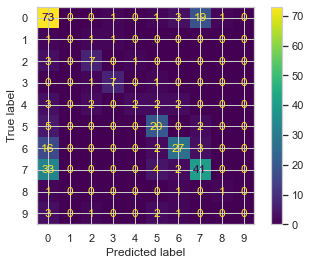

In [90]:
yeast_dict["knn"] = {"model":knn_randomized, "hyperparameters":1}
knn_prediction = model_results(yeast_dict['knn'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

           0       0.53      0.74      0.62        98
           1       0.00      0.00      0.00         3
           2       0.58      0.64      0.61        11
           3       0.78      0.78      0.78         9
           4       0.67      0.18      0.29        11
           5       0.62      0.74      0.68        27
           6       0.75      0.56      0.64        48
           7       0.63      0.51      0.57        80
           8       0.50      0.33      0.40         3
           9       0.00      0.00      0.00         7

    accuracy                           0.60       297
   macro avg       0.51      0.45      0.46       297
weighted avg       0.60      0.60      0.58       297

[[73  0  0  1  0  1  3 19  1  0]
 [ 1  0  1  1  0  0  0  0  0  0]
 [ 3  0  7  0  1  0  0  0  0  0]
 [ 0  0  1  7  0  1  0  0  0  0]
 [ 3  0  2  0  2  2  2  0  0  0]
 [ 5  0  0  0  0 20  0  2  0  0]
 [16  0  0  0  0  2 27  3  0  0]
 [33  0  0

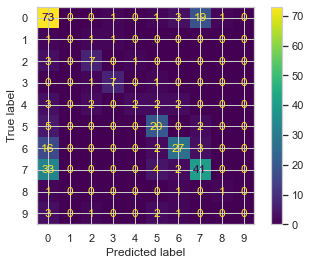

In [91]:
print(classification_report(y_test, knn_prediction))
print(confusion_matrix (y_test, knn_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, knn_prediction);

## 6. AdaBoost Classification

Fitting and Hyperparameter search 

In [92]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier().fit(X_train,y_train)

In [93]:
param_distribution = {'n_estimators': range(1, 250), 'learning_rate': scipy.stats.uniform(.1, 5)}
adaBoost_randomized = sklearn.model_selection.RandomizedSearchCV(adaBoost, param_distribution, verbose=1, random_state=0, cv=5, n_iter=50).fit(X_train, y_train)

print('Best Hyperparameters = ' + str(adaBoost_randomized.best_params_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters = {'learning_rate': 2.468002096733287, 'n_estimators': 204}


              precision    recall  f1-score   support

           0       0.41      0.22      0.29        98
           1       0.00      0.00      0.00         3
           2       0.55      0.55      0.55        11
           3       0.60      0.67      0.63         9
           4       0.27      0.27      0.27        11
           5       0.71      0.63      0.67        27
           6       0.38      0.35      0.37        48
           7       0.39      0.42      0.40        80
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         7

    accuracy                           0.35       297
   macro avg       0.33      0.31      0.32       297
weighted avg       0.41      0.35      0.37       297

[[22  0  1  1  0  0 15 40  8 11]
 [ 0  0  0  2  0  0  1  0  0  0]
 [ 2  0  6  0  1  0  0  0  1  1]
 [ 0  0  1  6  2  0  0  0  0  0]
 [ 2  0  2  1  3  2  0  0  0  1]
 [ 3  0  0  0  3 17  1  1  0  2]
 [ 9  0  0  0  0  2 17 13  4  3]
 [10  0  0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

+-------------------------+------------+
| Parameters / Metrics    |      Tuned |
+=========================+============+
| learning_rate           |   2.468    |
+-------------------------+------------+
| n_estimators            | 204        |
+-------------------------+------------+
| Accuracy                |   0.353535 |
+-------------------------+------------+
| weighted_f1             |   0.373677 |
+-------------------------+------------+
| macro_f1                |   0.317625 |
+-------------------------+------------+
| weighted_Recall         |   0.353535 |
+-------------------------+------------+
| Accuracy (tarin)        |   0.330523 |
+-------------------------+------------+
| weighted_f1 (tarin)     |   0.35397  |
+-------------------------+------------+
| macro_f1 (tarin)        |   0.411023 |
+-------------------------+------------+
| weighted_Recall (tarin) |   0.330523 |
+-------------------------+------------+


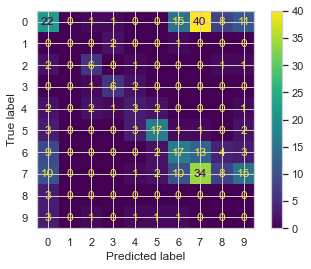

In [94]:
yeast_dict["adaboost"] = {"model":adaBoost_randomized, "hyperparameters":1}
adaboost_prediction = model_results(yeast_dict['adaboost'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

           0       0.41      0.22      0.29        98
           1       0.00      0.00      0.00         3
           2       0.55      0.55      0.55        11
           3       0.60      0.67      0.63         9
           4       0.27      0.27      0.27        11
           5       0.71      0.63      0.67        27
           6       0.38      0.35      0.37        48
           7       0.39      0.42      0.40        80
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         7

    accuracy                           0.35       297
   macro avg       0.33      0.31      0.32       297
weighted avg       0.41      0.35      0.37       297

[[22  0  1  1  0  0 15 40  8 11]
 [ 0  0  0  2  0  0  1  0  0  0]
 [ 2  0  6  0  1  0  0  0  1  1]
 [ 0  0  1  6  2  0  0  0  0  0]
 [ 2  0  2  1  3  2  0  0  0  1]
 [ 3  0  0  0  3 17  1  1  0  2]
 [ 9  0  0  0  0  2 17 13  4  3]
 [10  0  0

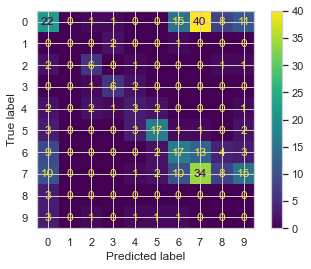

In [95]:
print(classification_report(y_test, adaboost_prediction))
print(confusion_matrix (y_test, adaboost_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, adaboost_prediction);

## 7. Gaussian Naive Bayes classification

In [96]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB().fit(X_train, y_train)

In [97]:
# param_distribution = {'n_estimators': range(1, 150), 'learning_rate': scipy.stats.reciprocal(1, 5)}
# adaBoost_randomized = sklearn.model_selection.RandomizedSearchCV(adaBoost, param_distribution, verbose=1, random_state=0, cv=3, n_iter=250).fit(X_train, y_train)
# print('Best Hyperparameters = ' + str(knn_randomized.best_params_))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

           0       1.00      0.01      0.02        98
           1       0.75      1.00      0.86         3
           2       0.24      0.73      0.36        11
           3       0.70      0.78      0.74         9
           4       0.10      0.36      0.15        11
           5       0.00      0.00      0.00        27
           6       0.00      0.00      0.00        48
           7       0.71      0.12      0.21        80
           8       0.50      0.33      0.40         3
           9       0.02      0.57      0.04         7

    accuracy                           0.13       297
   macro avg       0.40      0.39      0.28       297
weighted avg       0.57      0.13      0.12       297

[[ 1  0  9  0  7  0  0  3  1 77]
 [ 0  3  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  2  0  0  0  0  1]
 [ 0  0  1  7  1  0  0  0  0  0]
 [ 0  1  2  2  4  0  0  0  0  2]
 [ 0  0  0  1  3  0  0  1  0 22]
 [ 0  0  5  0 22  0  0  0  0 21]
 [ 0  0  6

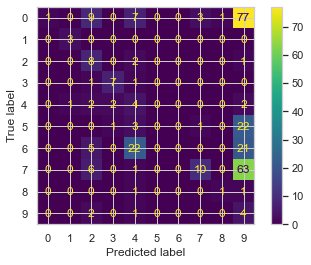

In [98]:
yeast_dict["gnb"] = {"model":naive_bayes, "hyperparameters":0}
naive_bayes_prediction = model_results(yeast_dict['gnb'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

           0       1.00      0.01      0.02        98
           1       0.75      1.00      0.86         3
           2       0.24      0.73      0.36        11
           3       0.70      0.78      0.74         9
           4       0.10      0.36      0.15        11
           5       0.00      0.00      0.00        27
           6       0.00      0.00      0.00        48
           7       0.71      0.12      0.21        80
           8       0.50      0.33      0.40         3
           9       0.02      0.57      0.04         7

    accuracy                           0.13       297
   macro avg       0.40      0.39      0.28       297
weighted avg       0.57      0.13      0.12       297

[[ 1  0  9  0  7  0  0  3  1 77]
 [ 0  3  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  2  0  0  0  0  1]
 [ 0  0  1  7  1  0  0  0  0  0]
 [ 0  1  2  2  4  0  0  0  0  2]
 [ 0  0  0  1  3  0  0  1  0 22]
 [ 0  0  5  0 22  0  0  0  0 21]
 [ 0  0  6

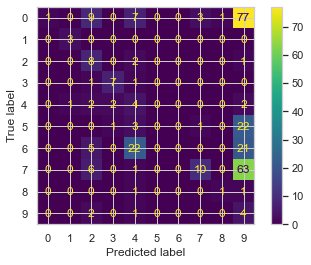

In [99]:
print(classification_report(y_test, naive_bayes_prediction))
print(confusion_matrix (y_test, naive_bayes_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, naive_bayes_prediction);

## 8. Neural Network classification

In [100]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=900)

In [101]:
param_distribution = {'max_iter': range(1000, 1500),
                        'alpha': scipy.stats.reciprocal(0.00001, 0.1), 
                        'learning_rate':['constant', 'invscaling', 'adaptive']}

mlp_randomized = sklearn.model_selection.RandomizedSearchCV(mlp, param_distribution, verbose=1, random_state=0, cv=3, n_iter=25).fit(X_train, y_train)
print('Best Hyperparameters = ' + str(knn_randomized.best_params_))

Fitting 3 folds for each of 25 candidates, totalling 75 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1192) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1192) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1192) reached and the optimization hasn't

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1244) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1244) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1459) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (14

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1426) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1262) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1262) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12

Best Hyperparameters = {'leaf_size': 32.178184839298616, 'n_neighbors': 37, 'weights': 'distance'}


              precision    recall  f1-score   support

           0       0.57      0.61      0.59        98
           1       1.00      0.67      0.80         3
           2       0.60      0.55      0.57        11
           3       0.70      0.78      0.74         9
           4       0.29      0.18      0.22        11
           5       0.63      0.63      0.63        27
           6       0.63      0.56      0.59        48
           7       0.51      0.54      0.52        80
           8       0.50      0.33      0.40         3
           9       0.40      0.29      0.33         7

    accuracy                           0.56       297
   macro avg       0.58      0.51      0.54       297
weighted avg       0.56      0.56      0.56       297

[[60  0  0  0  0  2  7 28  1  0]
 [ 0  2  1  0  0  0  0  0  0  0]
 [ 3  0  6  1  1  0  0  0  0  0]
 [ 0  0  0  7  2  0  0  0  0  0]
 [ 2  0  1  1  2  1  2  1  0  1]
 [ 2  0  0  1  1 17  1  5  0  0]
 [10  0  1  0  1  1 27  7  0  1]
 [28  0  0

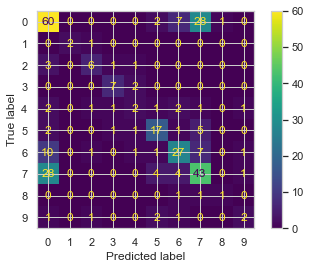

In [102]:
yeast_dict["nn"] = {"model":mlp_randomized, "hyperparameters":1}
nn_prediction = model_results(yeast_dict['nn'])

              precision    recall  f1-score   support

           0       0.57      0.61      0.59        98
           1       1.00      0.67      0.80         3
           2       0.60      0.55      0.57        11
           3       0.70      0.78      0.74         9
           4       0.29      0.18      0.22        11
           5       0.63      0.63      0.63        27
           6       0.63      0.56      0.59        48
           7       0.51      0.54      0.52        80
           8       0.50      0.33      0.40         3
           9       0.40      0.29      0.33         7

    accuracy                           0.56       297
   macro avg       0.58      0.51      0.54       297
weighted avg       0.56      0.56      0.56       297

[[60  0  0  0  0  2  7 28  1  0]
 [ 0  2  1  0  0  0  0  0  0  0]
 [ 3  0  6  1  1  0  0  0  0  0]
 [ 0  0  0  7  2  0  0  0  0  0]
 [ 2  0  1  1  2  1  2  1  0  1]
 [ 2  0  0  1  1 17  1  5  0  0]
 [10  0  1  0  1  1 27  7  0  1]
 [28  0  0

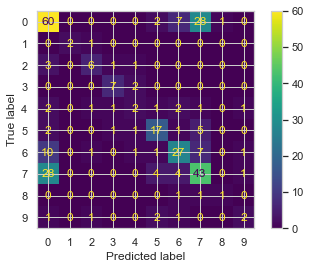

In [103]:
print(classification_report(y_test, nn_prediction))
print(confusion_matrix (y_test, nn_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, nn_prediction);

+-----------------+----------+----------+----------+----------+-----------+------------+
| model           |      acc |     w.f1 |    w.rec |   tr.acc |   tr.w.f1 |   tr.w.rec |
+=================+==========+==========+==========+==========+===========+============+
| logistic_r      | 0.606061 | 0.591098 | 0.606061 | 0.602867 |  0.593673 |   0.602867 |
+-----------------+----------+----------+----------+----------+-----------+------------+
| random_forest_r | 0.646465 | 0.633251 | 0.646465 | 1        |  1        |   1        |
+-----------------+----------+----------+----------+----------+-----------+------------+
| tree            | 0.565657 | 0.528619 | 0.565657 | 0.608769 |  0.590015 |   0.608769 |
+-----------------+----------+----------+----------+----------+-----------+------------+
| knn             | 0.599327 | 0.582725 | 0.599327 | 1        |  1        |   1        |
+-----------------+----------+----------+----------+----------+-----------+------------+
| adaboost        | 0

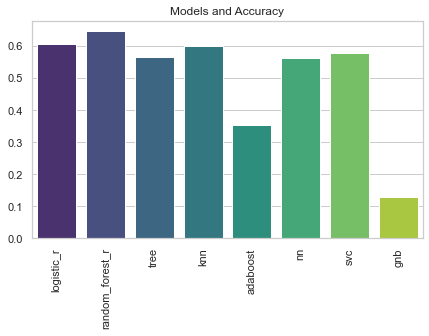

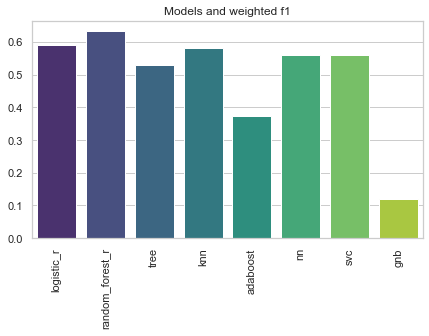

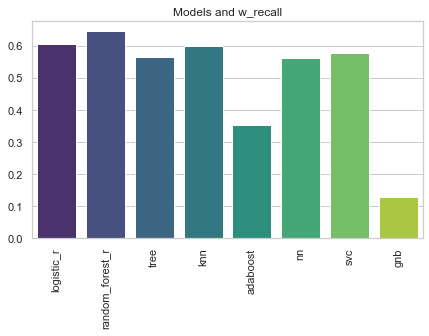

In [104]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,make_scorer,ConfusionMatrixDisplay,recall_score ,classification_report,accuracy_score,f1_score


def cross_checking_model_results(dictionary):
    table = [["model", "acc", "w.f1", 'w.rec','tr.acc','tr.w.f1', 'tr.w.rec']]
    x_models = []
    y_accuracy = []
    y_wf1 = []
    w_recall = []
    
    trny_accuracy = []
    trny_wf1 = []
    trnw_recall = []

    for model_key in MODELS:
        model = dictionary[model_key]['model']
        
        prediction = model.predict(X_test)
        accuracy = accuracy_score(y_test, prediction)
        weighted_f1 = f1_score(y_test, prediction, average='weighted')
        W_recall = recall_score(y_test, prediction,average='weighted')
        
        prediction_trn = model.predict(X_train)
        accuracy_trn = accuracy_score(y_train, prediction_trn)
        weighted_f1_trn = f1_score(y_train, prediction_trn, average='weighted')
        W_recall_trn = recall_score(y_train, prediction_trn,average='weighted')
        table.append([model_key, accuracy, weighted_f1, W_recall,
                     accuracy_trn, weighted_f1_trn, W_recall_trn,])
        
        x_models.append(model_key)
        y_accuracy.append(accuracy)
        y_wf1.append(weighted_f1)
        w_recall.append(W_recall)
        
        trny_accuracy.append(accuracy_trn)
        trny_wf1.append(weighted_f1_trn)
        trnw_recall.append(W_recall_trn)
    print(tabulate(table, headers='firstrow', tablefmt='grid'))
    
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(7,4))
    ax1 = sns.barplot(x=x_models, y=y_accuracy, palette="viridis")
    ax1.set_title('Models and Accuracy')
    ax1.set_xticklabels(labels=x_models, rotation=90)
    plt.figure(figsize=(7,4))
    ax2 = sns.barplot(x=x_models, y=y_wf1, palette="viridis")
    ax2.set_title('Models and weighted f1')
    ax2.set_xticklabels(labels=x_models, rotation=90)
    
    plt.figure(figsize=(7,4))
    ax2 = sns.barplot(x=x_models, y=w_recall, palette="viridis")
    ax2.set_title('Models and w_recall')
    ax2.set_xticklabels(labels=x_models, rotation=90)


cross_checking_model_results(yeast_dict)

In [105]:
import pickle
with open('base_classification_dict.dictionary', 'rb') as config_dictionary_file:
    base_classification_dict = pickle.load(config_dictionary_file)

base_classification_dict['yeast']= yeast_dict

with open('base_classification_dict.dictionary', 'wb') as config_dictionary_file:
    pickle.dump(base_classification_dict, config_dictionary_file)